<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/AnaAlonso_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36


In [2]:
pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671351 sha256=cdc857739d1a91e4730c8a2ce42755499a4fe29e534874df95c8746ab0dae6f4
  Stored in directory: /root/.cache/pip/wheels/3b/e5/00/0bf0173d67188fe73a13e3a61412b3f975f60205e3fab93a69
Successfully built docplex


In [3]:
pip install CPLEX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 10.0 MB/s eta 0:00:00


Github: yfinance

In [4]:
!pip install pytickersymbols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1


In [20]:
pip install qiskit_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.1 MB/s eta 0:00:00


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import seaborn as sns
import csv
import yfinance as yf

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

Nos vamos a fjar en el valor de cerrado (Close) para analizar las gráficas.

[*********************100%%**********************]  27 of 27 completed


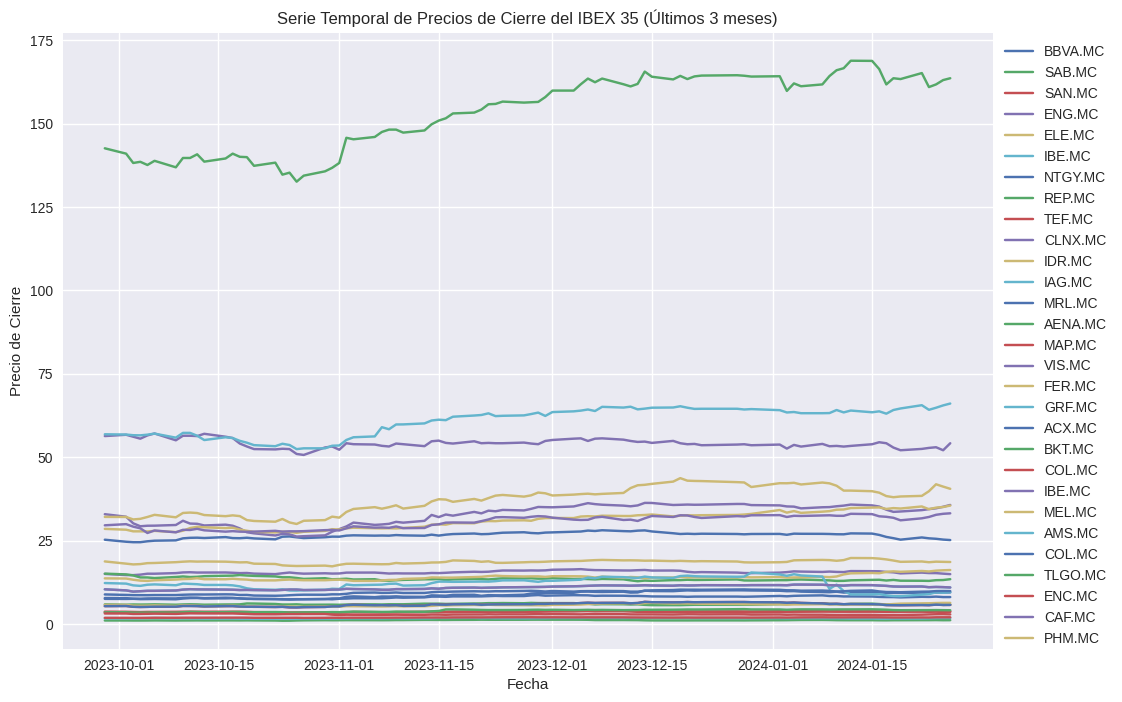

In [6]:
# Lista de símbolos de las acciones del IBEX35
ibex35_symbols = ['BBVA.MC', 'SAB.MC', 'SAN.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC',
                  'NTGY.MC', 'REP.MC', 'TEF.MC', 'CLNX.MC', 'IDR.MC', 'IAG.MC',
                  'MRL.MC', 'AENA.MC', 'MAP.MC', 'VIS.MC', 'FER.MC', 'GRF.MC',
                  'ACX.MC', 'BKT.MC', 'COL.MC', 'IBE.MC', 'MEL.MC', 'AMS.MC',
                  'COL.MC', 'TLGO.MC', 'ENC.MC', 'CAF.MC', 'PHM.MC']

# Fecha de inicio y fin (últimos 3 meses)
end_date = datetime.today() - timedelta(days=30)
start_date = end_date - timedelta(days=120)

# Descargar datos desde Yahoo Finance
ibex35_data = yf.download(ibex35_symbols, start=start_date, end=end_date)['Adj Close']

# Graficar la serie temporal de los precios de cierre
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(ibex35_data.index, ibex35_data[symbol], label=symbol)

plt.title('Serie Temporal de Precios de Cierre del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

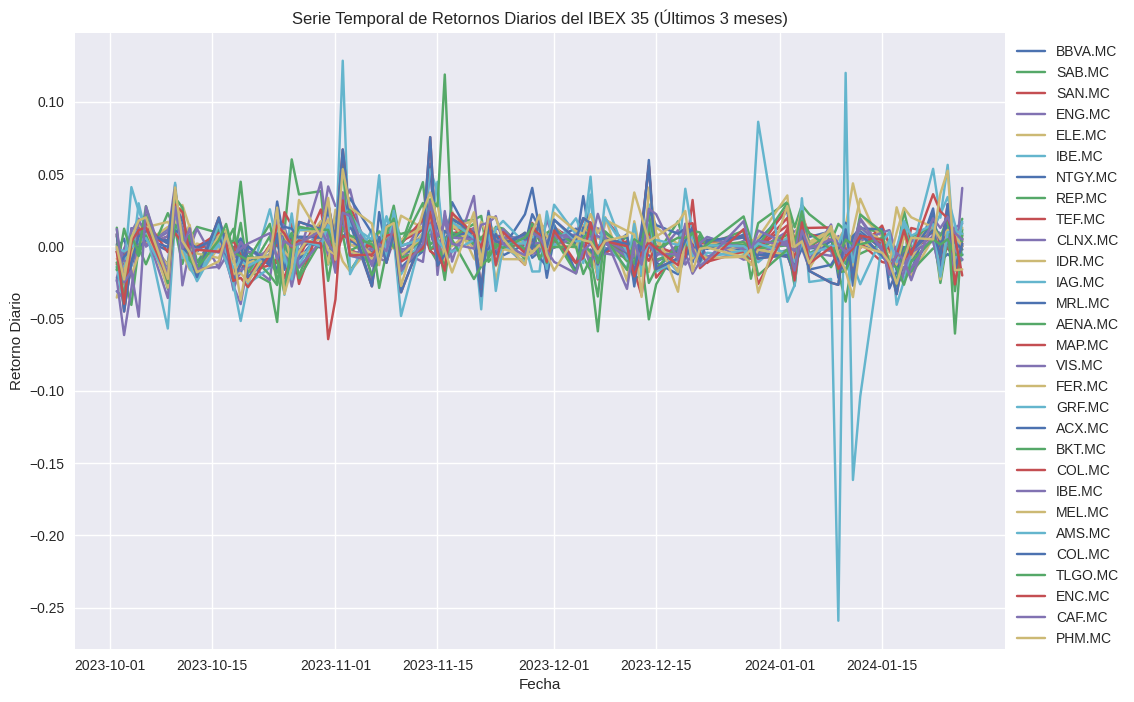

In [7]:
# Calcular los retornos diarios
returns = ibex35_data.pct_change()

# Graficar la serie temporal de los retornos
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.title('Serie Temporal de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

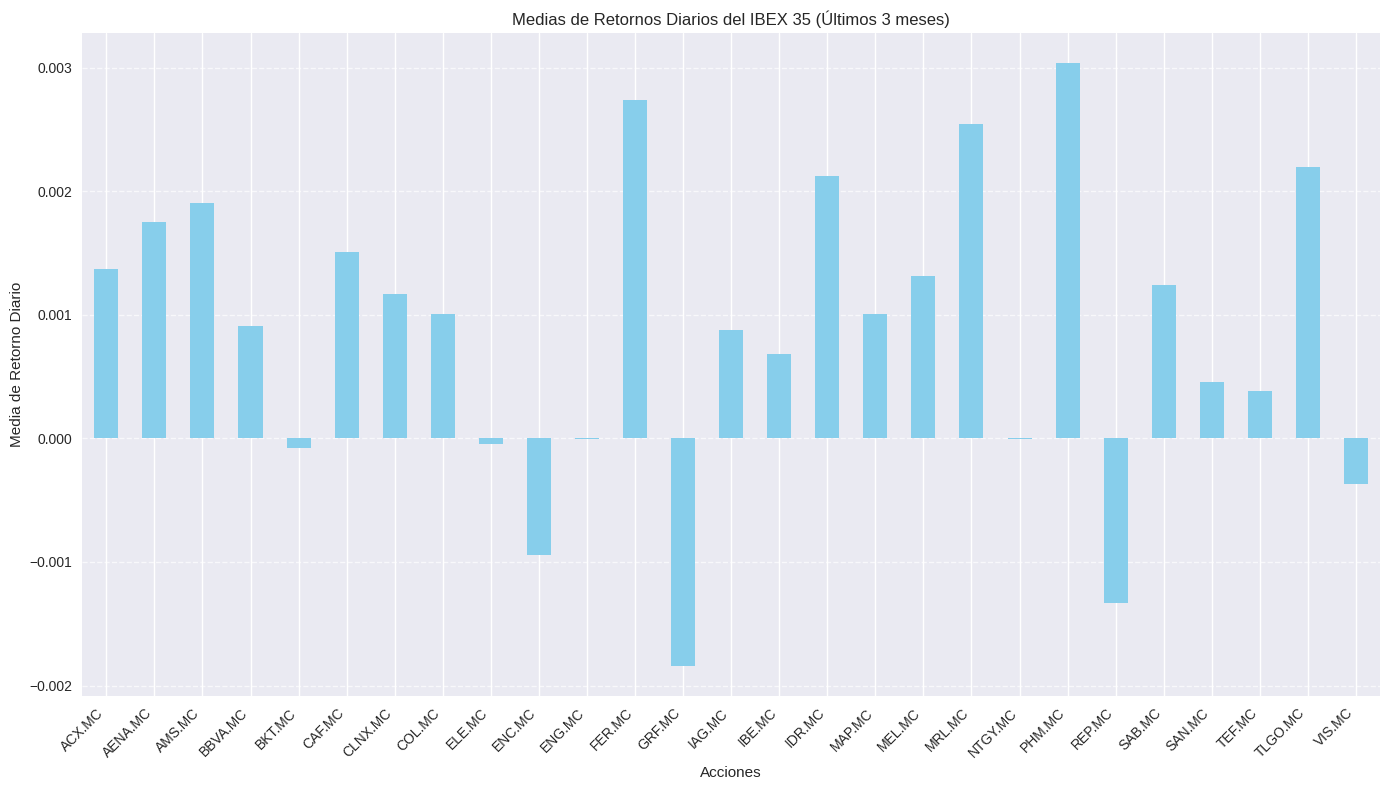

In [8]:
# Calcular la media de los retornos
mean_returns = returns.mean()

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos tanto la media como la varianza en el mismo gráfico de barras.

<Figure size 1400x800 with 0 Axes>

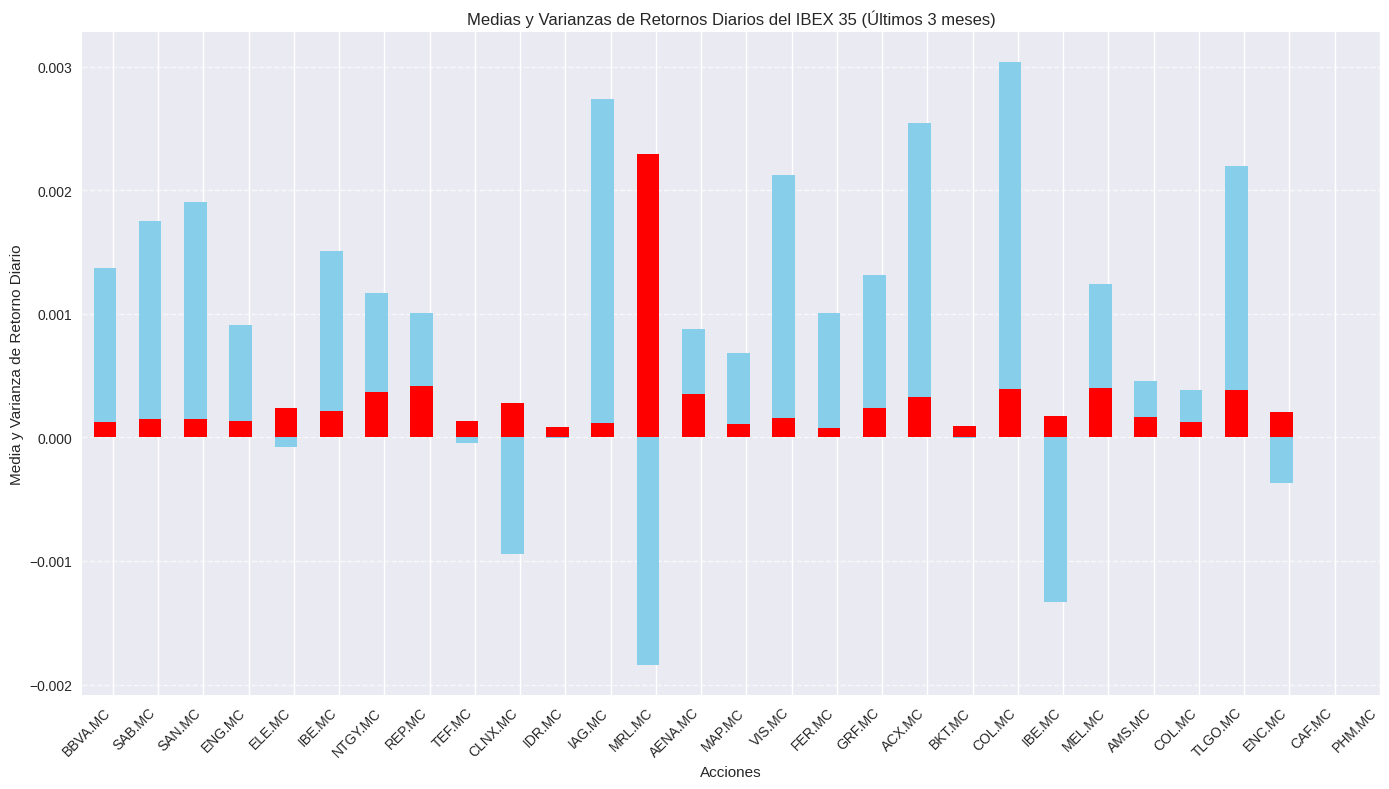

In [9]:
variance_returns = returns.var()

# Graficar el diagrama de barras de las medias y varianzas de los retornos
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ibex35_symbols))

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

variance_returns.plot(kind='bar', color='red')
plt.title('Medias y Varianzas de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(index + bar_width / 2, ibex35_symbols, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nos interesan aquellas acciones con una media alta y con poda varianza.

A continuación, vemos la misma gráfica pero la varianza en línea.

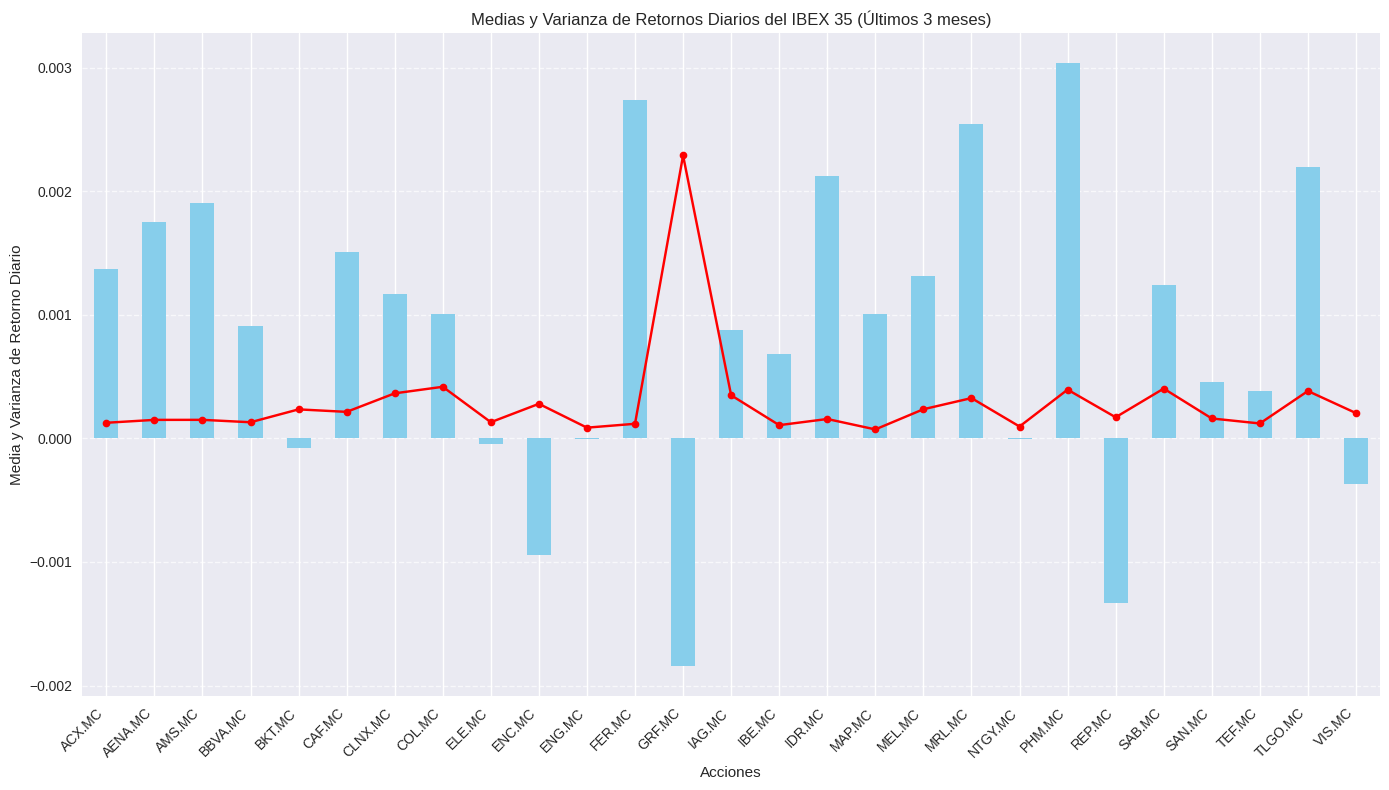

In [10]:
# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias y Varianza de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.plot(variance_returns, color = 'red', marker = '.', markeredgewidth = 2)

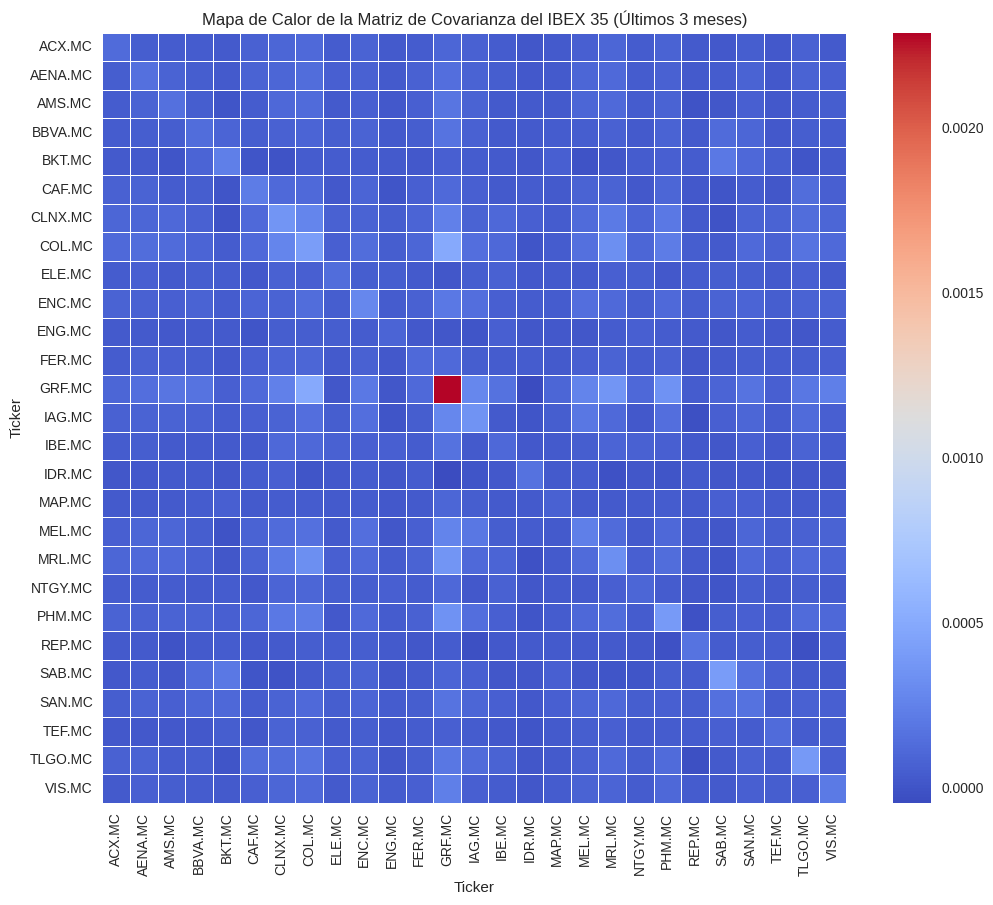

In [11]:
# Calcular la matriz de covarianza
covariance_matrix = returns.cov()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Covarianza del IBEX 35 (Últimos 3 meses)')
plt.show()

In [12]:
# Factor de inversión al riesgo: 0 < q < 1
q = 0.5

from itertools import combinations
vector = [0] * 27
combinations_list = list(combinations(range(27), 5))
results_dict = {}

for comb in combinations_list:
  new_vector = vector.copy()
  for index in comb:
    new_vector[index] = 1
    # print(new_vector)
  result_positions = []

  for index in comb:
    new_vector[index] = 1
  result_positions.append([i for i, x in enumerate(new_vector) if x == 1])
  # print(result_positions)

  primer_sumatorio = 0
  segundo_sumatorio = 0

  for i in range(27):
    primer_sumatorio = primer_sumatorio + new_vector[i]*mean_returns[i]
    for j in range(27):
      segundo_sumatorio = segundo_sumatorio + new_vector[i]*covariance_matrix.iloc[i,j]*new_vector[j]
  function = primer_sumatorio - q*segundo_sumatorio
  # Save results
  results_dict[comb] = (new_vector, function)

# # Print results dictionary
# for comb, (new_vector, function) in results_dict.items():
#     print(f"Combination: {comb}, New Vector: {new_vector}, Function Result: {function}")

KeyboardInterrupt: 

In [ ]:
max_value = float('-inf')  # Inicializar con un valor muy pequeño
max_index = None
for comb, (new_vector, function) in results_dict.items():
    if function > max_value:
        max_value = function
        max_index = comb

print("Maximum Function Value:", max_value)
print("Index of Maximum Function Value:", max_index)

Maximum Function Value: 0.010687748031479722
Index of Maximum Function Value: (3, 18, 20, 22, 23)


In [ ]:
print('La mejor combinación de acciones para invertir es:')
for index in max_index:
  print(ibex35_symbols[index])

La mejor combinación de acciones para invertir es:
ENG.MC
ACX.MC
COL.MC
MEL.MC
AMS.MC


In [13]:
from docplex.mp.model import Model

In [14]:
# Prepare problem instances
n = 27
q = 0.5
budget = 5

In [24]:
# Create docplex model
mdl = Model("a")
x = mdl.binary_var_list(range(n), name = "x")
objective = mdl.sum([mean_returns[i]*x[i] for i in range(n)])
objective -= q*mdl.sum([covariance_matrix.iloc[i,j] * x[i] * x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) <= budget)

docplex.mp.LinearConstraint[](x_0+x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_10+x_11+x_12+x_13+x_14+x_15+x_16+x_17+x_18+x_19+x_20+x_21+x_22+x_23+x_24+x_25+x_26,LE,5)

In [25]:
print(mdl.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: a

Maximize
 obj: 0.001372543104 x_0 + 0.001750338269 x_1 + 0.001905957574 x_2
      + 0.000911131962 x_3 - 0.000081522398 x_4 + 0.001506849178 x_5
      + 0.001165091929 x_6 + 0.001004317212 x_7 - 0.000045921746 x_8
      - 0.000944402426 x_9 - 0.000006310689 x_10 + 0.002737593956 x_11
      - 0.001841737272 x_12 + 0.000874048412 x_13 + 0.000684456959 x_14
      + 0.002123289377 x_15 + 0.001007879928 x_16 + 0.001316955411 x_17
      + 0.002547030370 x_18 - 0.000002485137 x_19 + 0.003036574757 x_20
      - 0.001334012243 x_21 + 0.001238286603 x_22 + 0.000456795850 x_23
      + 0.000380908045 x_24 + 0.002195808488 x_25 - 0.000373173260 x_26 + [
      - 0.000126161973 x_0^2 - 0.000106121285 x_0*x_1 - 0.000074888666 x_0*x_2
      - 0.000083745629 x_0*x_3 - 0.000063612092 x_0*x_4 - 0.000144439631 x_0*x_5
      - 0.000181808315 x_0*x_6 - 0.000226245956 x_0*x_7 - 0.000074752904 x_0*x_8
      - 0.000150062282 x_0*x

In [26]:
sol = mdl.solve()
mdl.print_solution()

objective: 0.011
status: OPTIMAL_SOLUTION(2)
  x_11=1
  x_15=1
  x_18=1
  x_20=1
  x_25=1


In [27]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators.docplex_mp import from_docplex_mp

In [28]:
# load from a Docplex model
mod = from_docplex_mp(mdl)
print(type(mod))
print()
print(mod.prettyprint())

<class 'qiskit_optimization.problems.quadratic_program.QuadraticProgram'>

Problem name: a

Maximize
  -6.308098666658543e-05*x_0^2 - 5.3060642553388484e-05*x_0*x_1
  - 3.1181606455012157e-05*x_0*x_10 - 3.664813940533524e-05*x_0*x_11
  - 9.921755795015974e-05*x_0*x_12 - 7.030886108625423e-05*x_0*x_13
  - 4.3028991060813286e-05*x_0*x_14 - 1.6820100124126903e-05*x_0*x_15
  - 3.385400653196425e-05*x_0*x_16 - 5.823479351747244e-05*x_0*x_17
  - 9.337483320385281e-05*x_0*x_18 - 3.9121521984229454e-05*x_0*x_19
  - 3.744433315764725e-05*x_0*x_2 - 7.894467532708427e-05*x_0*x_20
  - 3.162667587170781e-05*x_0*x_21 - 2.4578622212990286e-05*x_0*x_22
  - 4.7823921302521685e-05*x_0*x_23 - 2.136370347319726e-05*x_0*x_24
  - 6.854539937055502e-05*x_0*x_25 - 3.454078950326908e-05*x_0*x_26
  - 4.1872814574384875e-05*x_0*x_3 - 3.18060457732868e-05*x_0*x_4
  - 7.22198155367618e-05*x_0*x_5 - 9.090415767014203e-05*x_0*x_6
  - 0.00011312297805792952*x_0*x_7 - 3.7376452066977733e-05*x_0*x_8
  - 7.5031141133222

In [29]:
from qiskit_optimization.converters import InequalityToEquality

In [31]:
ineq2eq = InequalityToEquality()
qp_eq = ineq2eq.convert(mod)
print(qp_eq.prettyprint())

Problem name: a

Maximize
  -6.308098666658543e-05*x_0^2 - 5.3060642553388484e-05*x_0*x_1
  - 3.1181606455012157e-05*x_0*x_10 - 3.664813940533524e-05*x_0*x_11
  - 9.921755795015974e-05*x_0*x_12 - 7.030886108625423e-05*x_0*x_13
  - 4.3028991060813286e-05*x_0*x_14 - 1.6820100124126903e-05*x_0*x_15
  - 3.385400653196425e-05*x_0*x_16 - 5.823479351747244e-05*x_0*x_17
  - 9.337483320385281e-05*x_0*x_18 - 3.9121521984229454e-05*x_0*x_19
  - 3.744433315764725e-05*x_0*x_2 - 7.894467532708427e-05*x_0*x_20
  - 3.162667587170781e-05*x_0*x_21 - 2.4578622212990286e-05*x_0*x_22
  - 4.7823921302521685e-05*x_0*x_23 - 2.136370347319726e-05*x_0*x_24
  - 6.854539937055502e-05*x_0*x_25 - 3.454078950326908e-05*x_0*x_26
  - 4.1872814574384875e-05*x_0*x_3 - 3.18060457732868e-05*x_0*x_4
  - 7.22198155367618e-05*x_0*x_5 - 9.090415767014203e-05*x_0*x_6
  - 0.00011312297805792952*x_0*x_7 - 3.7376452066977733e-05*x_0*x_8
  - 7.503114113322214e-05*x_0*x_9 - 7.473734978326531e-05*x_1^2
  - 3.181370653240588e-05*x_1*

In [32]:
from qiskit_optimization.converters import IntegerToBinary

In [33]:
int2bin = IntegerToBinary()
qp_eq_bin = int2bin.convert(qp_eq)
print(qp_eq_bin.prettyprint())

Problem name: a

Maximize
  -6.308098666658543e-05*x_0^2 - 5.3060642553388484e-05*x_0*x_1
  - 3.1181606455012157e-05*x_0*x_10 - 3.664813940533524e-05*x_0*x_11
  - 9.921755795015974e-05*x_0*x_12 - 7.030886108625423e-05*x_0*x_13
  - 4.3028991060813286e-05*x_0*x_14 - 1.6820100124126903e-05*x_0*x_15
  - 3.385400653196425e-05*x_0*x_16 - 5.823479351747244e-05*x_0*x_17
  - 9.337483320385281e-05*x_0*x_18 - 3.9121521984229454e-05*x_0*x_19
  - 3.744433315764725e-05*x_0*x_2 - 7.894467532708427e-05*x_0*x_20
  - 3.162667587170781e-05*x_0*x_21 - 2.4578622212990286e-05*x_0*x_22
  - 4.7823921302521685e-05*x_0*x_23 - 2.136370347319726e-05*x_0*x_24
  - 6.854539937055502e-05*x_0*x_25 - 3.454078950326908e-05*x_0*x_26
  - 4.1872814574384875e-05*x_0*x_3 - 3.18060457732868e-05*x_0*x_4
  - 7.22198155367618e-05*x_0*x_5 - 9.090415767014203e-05*x_0*x_6
  - 0.00011312297805792952*x_0*x_7 - 3.7376452066977733e-05*x_0*x_8
  - 7.503114113322214e-05*x_0*x_9 - 7.473734978326531e-05*x_1^2
  - 3.181370653240588e-05*x_1*